In [1]:
from datasets import load_dataset
from transformers import LlamaTokenizer


tokenizer = LlamaTokenizer.from_pretrained(
    "decapoda-research/llama-7b-hf", add_eos_token=True
)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data = load_dataset("json", data_files="alpaca_data.json")


def generate_prompt(data_point):
    # sorry about the formatting disaster gotta move fast
    if data_point["input"]:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Input:
{data_point["input"]}

### Response:
{data_point["output"]}"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Response:
{data_point["output"]}"""


data = data.map(
    lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))}
)

C:\Users\hyunw_ewpy9hh\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hyunw_ewpy9hh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to C:/Users/hyunw_ewpy9hh/.cache/huggingface/datasets/json/default-ed0e7fd830af59cd/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/52002 [00:00<?, ? examples/s]

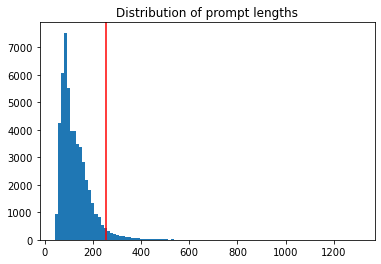

In [2]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(256, color="red")

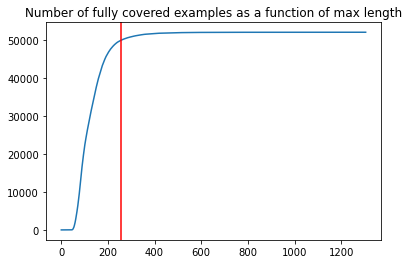

In [3]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=256, color="red")

Percentage of tokens left out:

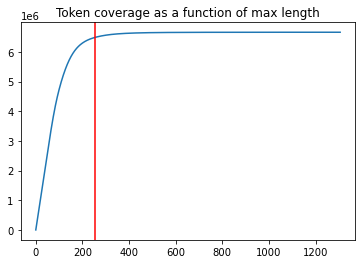

In [4]:
plt.plot([sum(min(l, m) for l in lens) for m in range(max(lens) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(x=256, color="red")